In [1]:
from jvm import LeNet5

In [2]:
model = LeNet5()

In [3]:
from jvm.builder import build_dataloader


In [4]:
batch_size = 64

In [5]:
train_transforms = [
    dict(name="Resize", size=32),
    dict(name="ToTensor"),
    dict(name="Normalize", mean=[
        0.1307,
    ], std=[
        0.3081,
    ])
]

In [6]:
train_loader_cfg = dict(
    dataset=dict(
        name="MNIST",
        root="data\MNIST",
        train=True,
        transforms=train_transforms,
        download=True,
    ),
    dataloader=dict(
        batch_size=batch_size,
        shuffle=True,
        num_workers=4,
        pin_memory=True,
    ),
)

In [7]:
mnist_train_loader = build_dataloader(train_loader_cfg)

torch.Size([64, 1, 32, 32]) torch.Size([64])


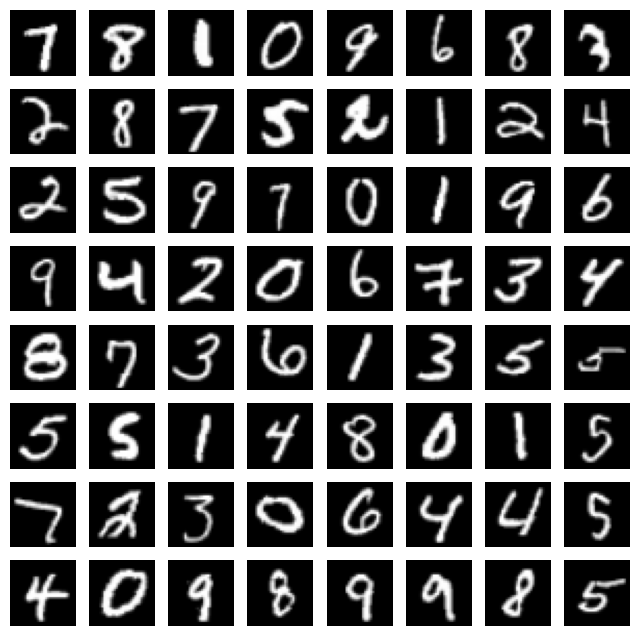

In [8]:
# check the data
import matplotlib.pyplot as plt
import numpy as np

data, target = next(iter(mnist_train_loader))
print(data.shape, target.shape)

fig, ax = plt.subplots(8, 8, figsize=(8, 8))
for i in range(8):
    for j in range(8):
        ax[i, j].imshow(data[i * 8 + j].numpy().squeeze(), cmap="gray")
        ax[i, j].axis("off")

In [11]:
target

tensor([7, 8, 1, 0, 9, 6, 8, 3, 2, 8, 7, 5, 2, 1, 2, 4, 2, 5, 9, 7, 0, 1, 9, 6,
        9, 4, 2, 0, 6, 7, 3, 4, 8, 7, 3, 6, 1, 3, 5, 5, 5, 5, 1, 4, 8, 0, 1, 5,
        7, 2, 3, 0, 6, 4, 4, 5, 4, 0, 9, 8, 9, 9, 8, 5])

In [59]:
import optax
import jax
import jax.numpy as jnp

learning_rate = 1e-3
key = jax.random.key(0)
k1, k2 = jax.random.split(key)

dummy_input = jax.random.normal(k1, (batch_size, 32, 32, 1))
params = model.init(k2, dummy_input)

tx = optax.adam(learning_rate=learning_rate)
opt_state = tx.init(params)

criteria = optax.losses.softmax_cross_entropy_with_integer_labels

def loss_fn(params, data, target):
    pred = model.apply(params, data)
    loss = criteria(pred, target)
    return jnp.mean(loss, axis=0)

loss_grad_fn = jax.value_and_grad(loss_fn)


In [2]:
import jax 
key = jax.random.key(0)
key

Array((), dtype=key<fry>) overlaying:
[0 0]

In [63]:

for epoch in range(10):
    loss_sum = 0
    for i , (data, target) in enumerate(mnist_train_loader):

        data = data.permute(0, 2, 3, 1)
        data, target = data.numpy(), target.numpy()
        # target = jax.nn.one_hot(target, 10).astype(np.float32)

        
        loss, grads = loss_grad_fn(params, data, target)
        updates, opt_state = tx.update(grads, opt_state)
        params = optax.apply_updates(params, updates)
        
        loss_sum += loss

        if i % 10 == 0:
            print(f"Epoch {epoch}, Iter {i}, Loss: {loss}")
            # calculate accuracy
            pred = model.apply(params, data)
            pred = jnp.argmax(pred, axis=1)
            acc = jnp.mean(pred == target)
            print(f"Accuracy: {acc}")

    print(f"Epoch {epoch}, Loss: {loss_sum / len(mnist_train_loader)}")

Epoch 0, Iter 0, Loss: 0.06301378458738327
Accuracy: 0.984375
Epoch 0, Iter 10, Loss: 0.17069274187088013
Accuracy: 0.953125
Epoch 0, Iter 20, Loss: 0.10158884525299072
Accuracy: 0.96875
Epoch 0, Iter 30, Loss: 0.02001667208969593
Accuracy: 1.0
Epoch 0, Iter 40, Loss: 0.0738370344042778
Accuracy: 0.984375
Epoch 0, Iter 50, Loss: 0.00615216139703989
Accuracy: 1.0
Epoch 0, Iter 60, Loss: 0.03779330104589462
Accuracy: 1.0
Epoch 0, Iter 70, Loss: 0.018153974786400795
Accuracy: 1.0
Epoch 0, Iter 80, Loss: 0.04801566153764725
Accuracy: 0.984375
Epoch 0, Iter 90, Loss: 0.07690661400556564
Accuracy: 0.984375
Epoch 0, Iter 100, Loss: 0.10863075405359268
Accuracy: 0.96875
Epoch 0, Iter 110, Loss: 0.1700584441423416
Accuracy: 0.953125
Epoch 0, Iter 120, Loss: 0.029753096401691437
Accuracy: 1.0
Epoch 0, Iter 130, Loss: 0.014247087761759758
Accuracy: 1.0
Epoch 0, Iter 140, Loss: 0.027297405526041985
Accuracy: 0.984375
Epoch 0, Iter 150, Loss: 0.04310118407011032
Accuracy: 0.984375


KeyboardInterrupt: 

In [58]:
opt_state




(ScaleByAdamState(count=Array(1, dtype=int32), mu={'params': {'LeNet5_Backbone_0': {'Conv_0': {'kernel': Array([[[[-9.7018055e-04,  8.3935527e-05, -3.6136960e-04,
           -4.3601656e-04,  1.6483385e-04,  1.7035302e-03]],
 
         [[-1.3729640e-03, -2.8544664e-04, -6.1859871e-04,
            9.3601347e-04,  4.1532188e-04,  2.9426888e-03]],
 
         [[-1.8402115e-03, -5.7819532e-05, -1.0562135e-03,
            1.0370354e-03,  8.2476559e-04,  2.8744114e-03]],
 
         [[-1.7299418e-03,  4.8183138e-04, -1.2514245e-03,
            8.7097177e-04,  1.0782818e-03,  2.4527002e-03]],
 
         [[-1.9030471e-03,  1.4199276e-03, -1.3939061e-03,
            1.8758373e-04,  1.5902057e-03,  8.8130025e-04]]],
 
 
        [[[-3.1894841e-04,  1.4634494e-03, -3.3821553e-04,
           -1.9944539e-04, -4.9637882e-05,  2.0463045e-03]],
 
         [[-8.7304041e-04,  7.6602504e-04, -4.5710133e-04,
            1.3513333e-03,  2.2398269e-04,  3.0703496e-03]],
 
         [[-2.0616830e-03,  9.5631834e-